Importing Bibliotiques

In [20]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt

Importing Data

In [36]:


# Set the path to your "MyData" folder
data_path = "./MyData"



# Check if the saved data and labels files exist
if os.path.exists("data.npy") and os.path.exists("labels.npy"):
    # Load data and labels from saved files
    data = np.load('data.npy')
    labels = np.load('labels.npy')
else:
    # Define the input image size
    image_size = (32, 32)
    # Data loading and preprocessing code
    data = []
    labels = []

    for class_folder in os.listdir(data_path):
        class_folder_path = os.path.join(data_path, class_folder)
        if os.path.isdir(class_folder_path):
            class_label = int(class_folder)
            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)
                image = cv2.imread(image_path)
                image = cv2.resize(image, image_size)
                data.append(image.flatten())
                labels.append(class_label)

    # Convert data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    # Save data and labels as numpy arrays
    np.save('data.npy', data)
    np.save('labels.npy', labels)

Split and Normalise data


In [22]:
from sklearn.utils import shuffle


data, labels = shuffle(data, labels, random_state=42)
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize pixel values
train_data = train_data / 255.0
test_data = test_data / 255.0



Creating Model and Save it


In [6]:
if os.path.exists("my_model.pickle"):
    svm = pickle.load(open("my_model.pickle", "rb"))
else:
    svm = SVC(kernel="linear")
    svm.fit(train_data, train_labels)
    filename = "my_model.pickle"
    pickle.dump(svm, open(filename, "wb"))

#Accuracy



In [15]:
# predictionsTrain = svm.predict(train_data)

# accuracy = accuracy_score(train_labels, predictionsTrain)
# print("Train Accuracy:", accuracy)
predictionsTest = svm.predict(test_data)

accuracy = accuracy_score(test_labels, predictionsTest)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9949412086409626


# predict 

In [48]:
def predict(data):
    labels_df = pd.read_csv('labels.csv')
    svm.predict(data.reshape(1, -1))
    labels_df.set_index('ClassId', inplace=True)
    predicted_class_id = svm.predict(data.reshape(1, -1))
    predicted_class_name = labels_df.loc[predicted_class_id[0], 'Name']
    print(predicted_class_name)
    image = data.reshape(32, 32, 3)  # Remodeler les données en une image de forme (32, 32, 3)
    plt.imshow(image)
    plt.axis('off')  # Désactiver les étiquettes d'axe
    plt.show()



Speed limit (60km/h)


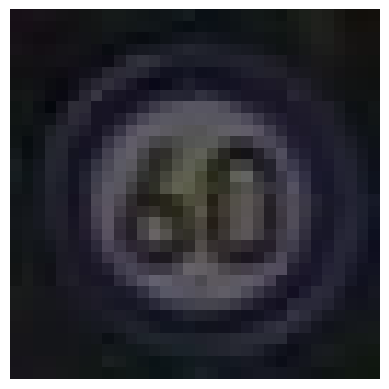

In [56]:
predict(test_data[50])